# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Task List 20: Introduction to Decision Trees for classification and regression problems.

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

## Intro

The goal of this tasklist is to practice Decision Tree Classification and Regression models on some simple dataset. Let's make some imports and dive in.

In [1]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# - data
import numpy as np
import pandas as pd

# - os
import os

# - ml
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


# - visualization
import matplotlib.pyplot as plt
import seaborn as sns

import collections

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

## 1. Decision Tree Classificator

In this part of the Tasklist we'll fit a Decision Tree Classifire on a `heart_failure_clinical_records_dataset` dataset in order to predict from various patient's parameters whether there's a high risk of heart faliure. The dataset can be downloaded [here](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data).

In [2]:
df = pd.read_csv(os.path.join(data_dir, 'heart_failure_clinical_records_dataset.csv'))
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


The dataset contains both numerical and categorical variables. Categorical variables are binary, and we don't need to perform encoding for them. The variable we're going to predict is given with `DEATH_EVENT` column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The dataset does not have any missing values, and we can start working with it right away.

***

**01.** Using `entropy` criterion, fit `scikit-learn` `DecisionTreeClassifier` on this dataset in order to predict the value of `DEATH_EVENT` variable from all the others. You will use this entire dataset as a training set.

In [4]:
from sklearn.tree import DecisionTreeClassifier

# create DT
dc = DecisionTreeClassifier(criterion='entropy')

# fit the DT
X, y = df.drop(columns=['DEATH_EVENT']), df[['DEATH_EVENT']]
dc.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

**02.** Preform predictions on the whole dataset using the model above.

In [5]:
predictions = dc.predict(X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

**03.** Using `classification_report` from `scikit-learn` print out a report listing various metrics of model performance.

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        96

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



**04.** Now fit a Decision Tree Classifier on this dataset with maximal depth equal to 3, using `gini` criterion. 

In [7]:
# create DT
dc = DecisionTreeClassifier(max_depth=3, criterion='gini')

# fit the DT
dc.fit(X, y)

DecisionTreeClassifier(max_depth=3)

**05.** 

**a)** Using `classification_report` print out a report listing various metrics of this model performance.

**b)** Make a confusion matrix of this model predictions. 

In [8]:
predictions = dc.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       203
           1       0.80      0.79      0.80        96

    accuracy                           0.87       299
   macro avg       0.85      0.85      0.85       299
weighted avg       0.87      0.87      0.87       299



In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, predictions)

array([[184,  19],
       [ 20,  76]], dtype=int64)

**06.** The following set of functons will help you out compute the largest Information Gain for a given split, based on some criterion (no need to study this code in detail, it is taken from live session notebook):

In [10]:
def self_information(p: float = .5):
    return -np.log2(p)


def entropy(x):
    _, counts = np.unique(x, return_counts=True)
    p = counts/np.sum(counts)
    return np.sum(p * self_information(p))


def gini(x):
    _, counts = np.unique(x, return_counts=True)
    p = counts/np.sum(counts)
    return 1 - np.sum(np.array(p)**2)


# let's define one simple holder for our results
ig_result = collections.namedtuple('gain', ['criterion',
                                            'gain', 
                                            'group_a_criterion', 
                                            'group_b_criterion', 
                                            'group_a_criterion_scaled', 
                                            'group_b_criterionscaled'])

def gain(df, column, threshold, label, criterion=entropy):
    # if threshold is for numerical column, then comparison is performed this way
    if (isinstance(threshold, np.float64) 
        or isinstance(threshold, np.int64) 
        or isinstance(threshold, int) 
        or isinstance(threshold, float)):
        group_a, group_b = df[df[column] <= threshold], df[df[column] > threshold]
    # otherwise threshold for categorical variable is supported
    elif isinstance(threshold, str):
        group_a, group_b = df[df[column] == threshold], df[df[column] != threshold]
    # throw exception if threshold is of different type
    else:
        raise Exception(f'Unrecognized type of threshold {threshold}: {type(threshold)}')

    if (len(group_a) == 0) or (len(group_b) == 0):
        ig = 0
        return ig_result(str(criterion.__name__), ig, 0, 0, 0, 0)

    # original set's entropy
    original_entropy = criterion(df[label])

    # entropies of each group
    group_a_entropy = criterion(group_a[label])
    group_b_entropy = criterion(group_b[label])

    # we have to scale them because of their size
    group_a_entropy_scaled = group_a_entropy * len(group_a)/len(df)
    group_b_entropy_scaled = group_b_entropy * len(group_b)/len(df)

    # this information gain after split
    ig = original_entropy - (group_a_entropy_scaled + group_b_entropy_scaled)
    return ig_result(str(criterion.__name__),
                    ig, 
                    group_a_entropy, 
                    group_b_entropy,
                    group_a_entropy_scaled,
                    group_b_entropy_scaled)

Say, you want to split the whole dataset based on `age` parameter, using Gini Impurity. What split would give you the largest information gain, i.e. splitting at what `age` value do we get the best information gain?

*Hint:* Look at how the `gain` function is used in the corresponding live session notebook; implement it with appropriate argument changes. 

In [11]:
igs = []
for i in np.sort(df['age'].unique()):
    _, ig, _, _ ,_, _ = gain(df, 'age', int(i), 'DEATH_EVENT', criterion=gini)
    print(f'If we split num at {i:>2} then IG={ig:.3f}')
    igs.append((i, ig))
igs = np.array(igs)

If we split num at 40.0 then IG=0.005
If we split num at 41.0 then IG=0.006
If we split num at 42.0 then IG=0.007
If we split num at 43.0 then IG=0.008
If we split num at 44.0 then IG=0.009
If we split num at 45.0 then IG=0.005
If we split num at 46.0 then IG=0.005
If we split num at 47.0 then IG=0.005
If we split num at 48.0 then IG=0.003
If we split num at 49.0 then IG=0.003
If we split num at 50.0 then IG=0.003
If we split num at 51.0 then IG=0.003
If we split num at 52.0 then IG=0.005
If we split num at 53.0 then IG=0.008
If we split num at 54.0 then IG=0.007
If we split num at 55.0 then IG=0.011
If we split num at 56.0 then IG=0.012
If we split num at 57.0 then IG=0.011
If we split num at 58.0 then IG=0.014
If we split num at 59.0 then IG=0.010
If we split num at 60.0 then IG=0.006
If we split num at 60.667 then IG=0.006
If we split num at 61.0 then IG=0.007
If we split num at 62.0 then IG=0.008
If we split num at 63.0 then IG=0.014
If we split num at 64.0 then IG=0.016
If we spli

## 2. Decision Tree Regressor

In order to practice DT Regression, we get back to our old fishy friend - the `Fish Market` dataset.

In [12]:
df = pd.read_csv(os.path.join(data_dir, 'Fish.csv'))
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


**07.** Fit a `DecisionTreeRegressor` from `scikit-learn` on this dataset using `squared_error` criterion, in order to predict a fish `Weight` from all the other **numerical** predictors. Use this whole dataset as a train set. 

In [13]:
from sklearn.tree import DecisionTreeRegressor

#dropping 'Species' collumn as it is not a numerical feature
df = df.drop(columns='Species')

#prepearing the feature matrix and target vector
X = df.drop(columns='Weight')
y = df['Weight']


#fitting a decision tree regressor
dtr = DecisionTreeRegressor(criterion='squared_error')
dtr.fit(X, y)

DecisionTreeRegressor()

**08.** 

**a)** Preform predictions on the whole dataset using the model above.

**b)** Without looking at the metrics right away, plot a scatterplot showing true value vs. predicted values. What are your conclusions from observing this plot? Does the model perform good on the (training) dataset? Is this actually a promising result? Why not?

In [14]:
predictions = dtr.predict(X)

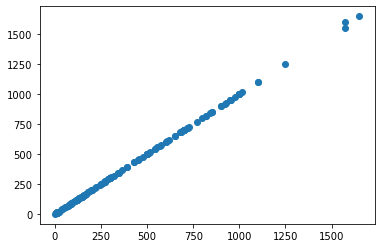

In [15]:
plt.scatter(predictions, y);

It seems that the model performs with almost 100% accuracy on the training dataset, but this is actually not a promising result, as it indicates a (very) possible heavy overfit.

**09.** What are $R^2$ and MSE of this model?

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(predictions, y)

0.9999382600468198

In [17]:
mean_squared_error(predictions, y)

7.861635220125786

**10.** Using `Height` vs. `Weight` scatterplot of the datapoints, plot how Regression Tree partitions the predictor space.

*Hint:* Live session notebooks are your best friend.

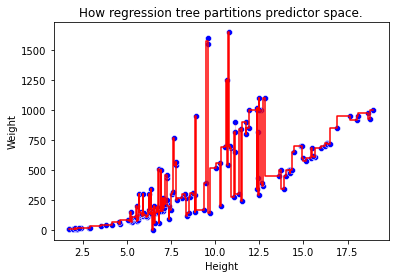

In [18]:
sns.scatterplot(x=df['Height'], y=df['Weight'], color='blue')
sns.lineplot(x=df['Height'], y=predictions, color='red', drawstyle='steps-pre');
plt.title('How regression tree partitions predictor space.');

**11.** 

**a)** Now fit a Decision Tree Regressor on this dataset with maximal depth equal to 3, using the same `squared_error` criterion.

**b)** Plot this decision tree. 

In [19]:
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=3)
dtr.fit(X, y)

DecisionTreeRegressor(max_depth=3)

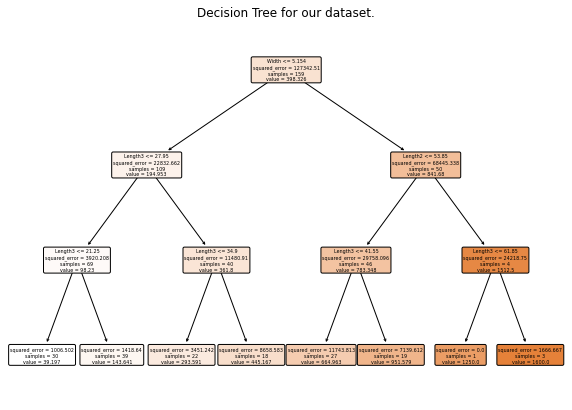

In [20]:
from sklearn.tree import plot_tree

# plot the DT
fig = plt.figure(figsize=(10, 7))
_ = plot_tree(dtr, 
               feature_names=dtr.feature_names_in_,  
               class_names=['no', 'yes'],
               filled=True, 
               rounded=True)

plt.gca().set_title('Decision Tree for our dataset.');

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>